### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [201]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as ts
from statsmodels.graphics.tsaplots import plot_acf

In [189]:
# Loading data 
sunspots = pd.read_csv("C:/Users/Luswata/Dropbox/ML_AI_UCBerkeley/MODULE_10_TimeSeries/data/sunspots.csv")
sunspots.shape

(309, 2)

In [191]:
sunspots.describe()

,YEAR,SUNACTIVITY
count,309.000000,309.000000
mean,1854.000000,49.752104
std,89.344838,40.452595
min,1700.000000,0.000000
25%,1777.000000,16.000000
50%,1854.000000,40.000000
75%,1931.000000,69.800000
max,2008.000000,190.200000


In [192]:
zero_count = (sunspots['SUNACTIVITY'] <= 0).sum()

print(f"Number of occurrences where SUNACTIVITY is <= 0: {zero_count}")

Number of occurrences where SUNACTIVITY is <= 0: 3


In [193]:
#sunspots = sunspots[sunspots['SUNACTIVITY'] > 0]
#sunspots.shape

In [194]:
# covert dates to timestamp object
sunspots['YEAR'] = pd.to_datetime(sunspots['YEAR'], format='%Y')

# set YEAR as index
sunspots = sunspots.set_index(pd.to_datetime(sunspots['YEAR']))

# Get the difference from the first record
first_value = sunspots['SUNACTIVITY'].iloc[0]  # Get the value of the first record
sunspots['diff_sunactivity'] = sunspots['SUNACTIVITY'] - first_value

sunspots

,YEAR,SUNACTIVITY,diff_sunactivity
YEAR,,,
1700-01-01,1700-01-01,5.0,0.0
1701-01-01,1701-01-01,11.0,6.0
1702-01-01,1702-01-01,16.0,11.0
1703-01-01,1703-01-01,23.0,18.0
1704-01-01,1704-01-01,36.0,31.0
...,...,...,...
2004-01-01,2004-01-01,40.4,35.4
2005-01-01,2005-01-01,29.8,24.8
2006-01-01,2006-01-01,15.2,10.2


In [195]:
# Keep only key columns
df = sunspots
sunspots = sunspots[['diff_sunactivity']]
sunspots

,diff_sunactivity
YEAR,
1700-01-01,0.0
1701-01-01,6.0
1702-01-01,11.0
1703-01-01,18.0
1704-01-01,31.0
...,...
2004-01-01,35.4
2005-01-01,24.8
2006-01-01,10.2


In [196]:
# split the dataset
tdata = sunspots[:"1984-12-31"]
fdata = sunspots["1985-01-01":]
tdata.shape, fdata.shape

((285, 1), (24, 1))

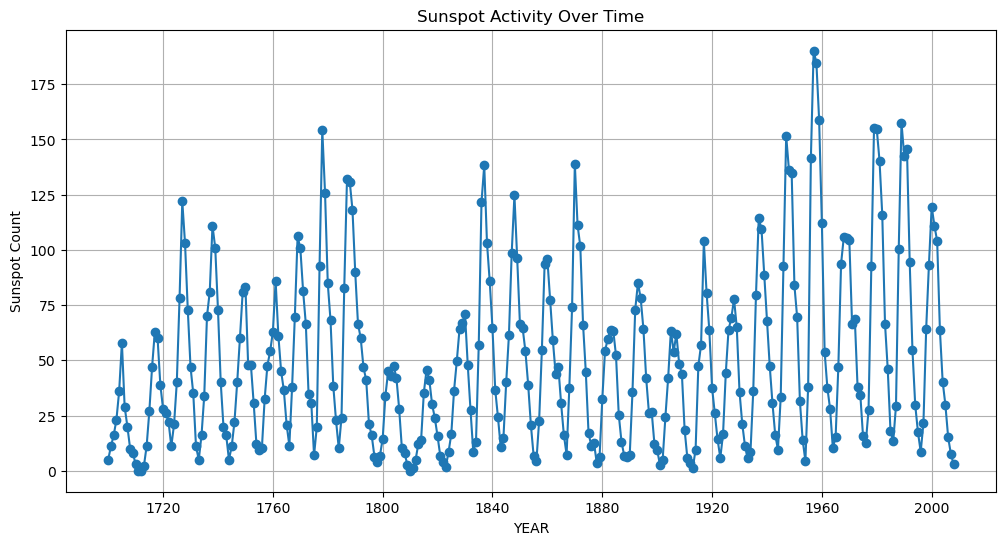

In [197]:
# Plotting the original sunspot activity over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['SUNACTIVITY'], marker='o', linestyle='-')
plt.title('Sunspot Activity Over Time')
plt.xlabel('YEAR')
plt.ylabel('Sunspot Count')
plt.grid(True)
plt.show()

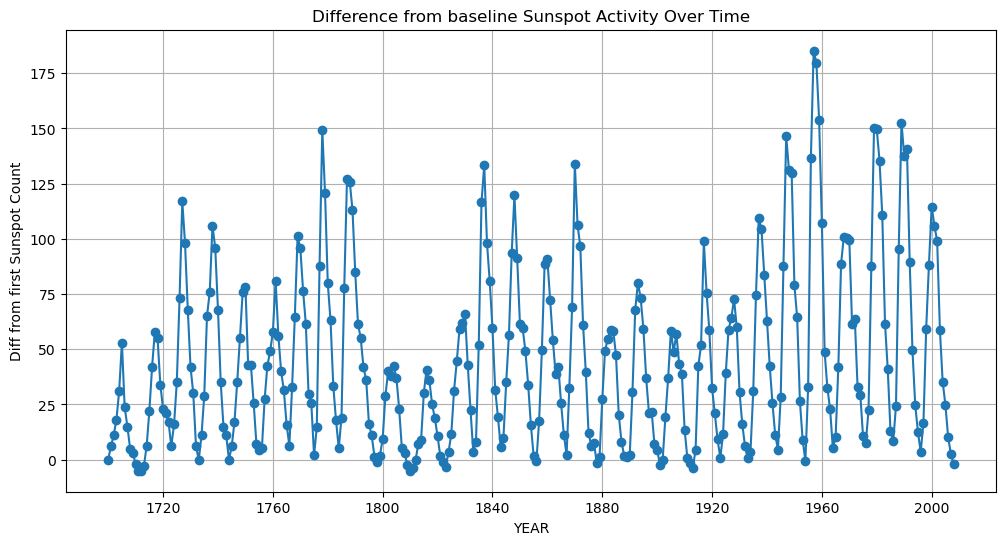

In [198]:
# Plotting the sunspot activity over time
plt.figure(figsize=(12, 6))
plt.plot(sunspots.index, sunspots['diff_sunactivity'], marker='o', linestyle='-')
plt.title('Difference from baseline Sunspot Activity Over Time')
plt.xlabel('YEAR')
plt.ylabel('Diff from first Sunspot Count')
plt.grid(True)
plt.show()

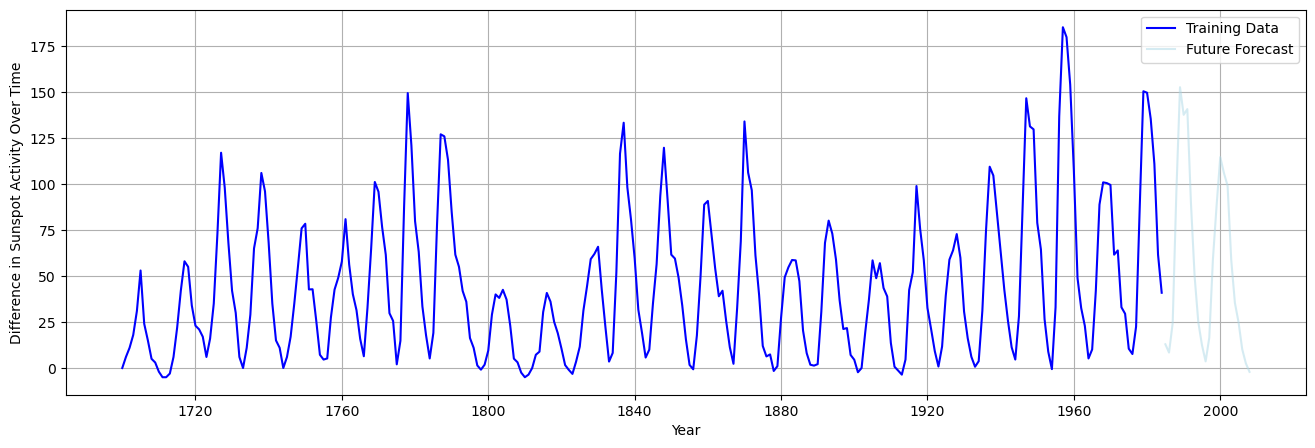

In [199]:
plt.figure(figsize=(16, 5))
plt.plot(tdata, color='blue', label='Training Data')
plt.plot(fdata, color='lightblue', alpha=0.5, label='Future Forecast')

plt.ylabel("Difference in Sunspot Activity Over Time")
plt.xlabel("Year")
plt.legend() 
plt.grid(True)  
plt.show()

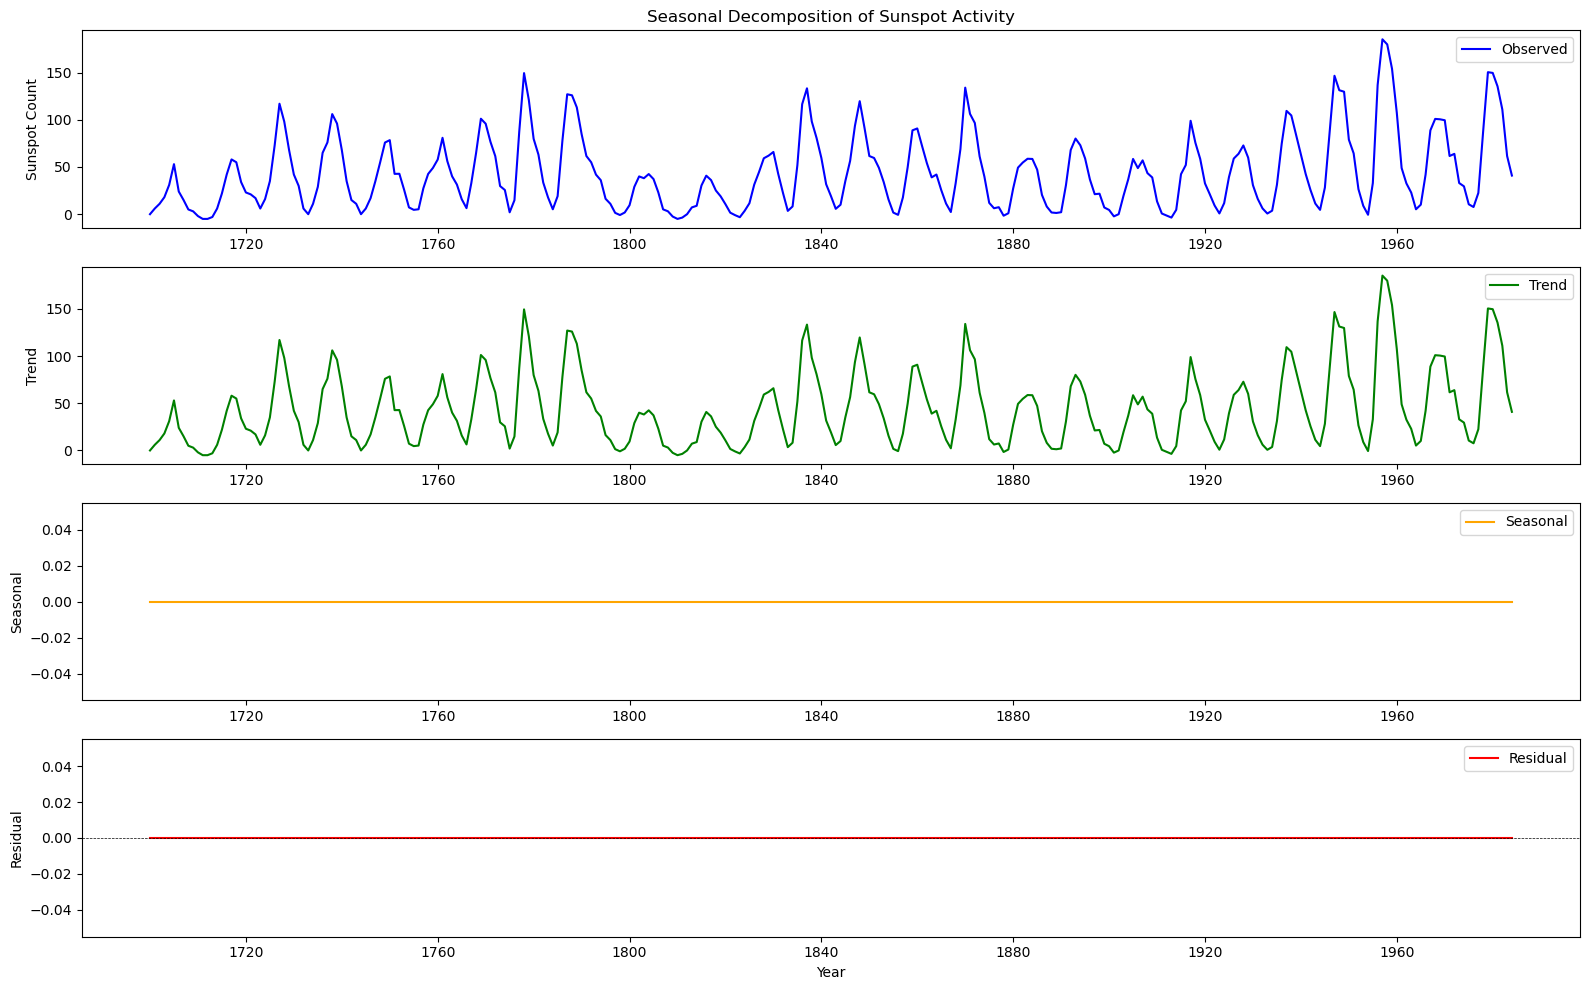

C:\Users\Luswata\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


<Figure size 1200x600 with 0 Axes>

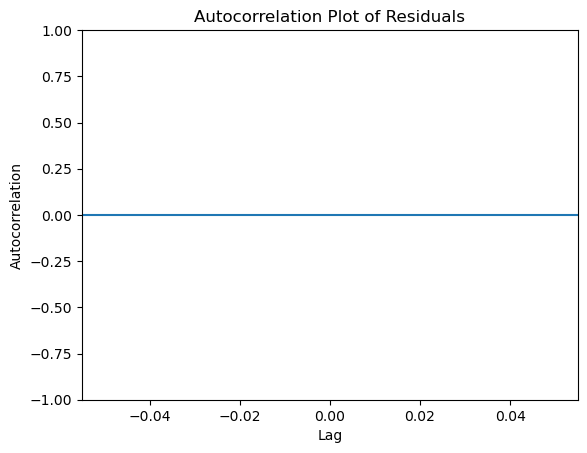

In [202]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(tdata['diff_sunactivity'], model='additive')

# Plotting decomposition components with different colors and axis labels
plt.figure(figsize=(16, 10))

plt.subplot(411)
plt.plot(tdata.index, tdata['diff_sunactivity'], label='Observed', color='blue')
plt.ylabel('Sunspot Count')
plt.title('Seasonal Decomposition of Sunspot Activity')
plt.legend()

plt.subplot(412)
plt.plot(tdata.index, decomposition.trend, label='Trend', color='green')
plt.ylabel('Trend')
plt.legend()

plt.subplot(413)
plt.plot(tdata.index, decomposition.seasonal, label='Seasonal', color='orange')
plt.ylabel('Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(tdata.index, decomposition.resid, label='Residual', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) 
plt.ylabel('Residual')
plt.xlabel('Year')
plt.legend()


plt.tight_layout()
plt.show()

# Autocorrelation plot for residuals
plt.figure(figsize=(12, 6))
plot_acf(decomposition.resid.dropna(), lags=30, alpha=0.05)
plt.title('Autocorrelation Plot of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [204]:
# Durbin-Watson Statistic
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistic for residuals
dw_statistic = durbin_watson(decomposition.resid.dropna())

# Print the result
print(f"Durbin-Watson statistic: {dw_statistic}")

# Interpretation
if dw_statistic < 1.5:
    print("Positive autocorrelation may be present.")
elif dw_statistic > 2.5:
    print("Negative autocorrelation may be present.")
else:
    print("No significant autocorrelation detected.")


Durbin-Watson statistic: nan
No significant autocorrelation detected.


C:\Users\Luswata\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


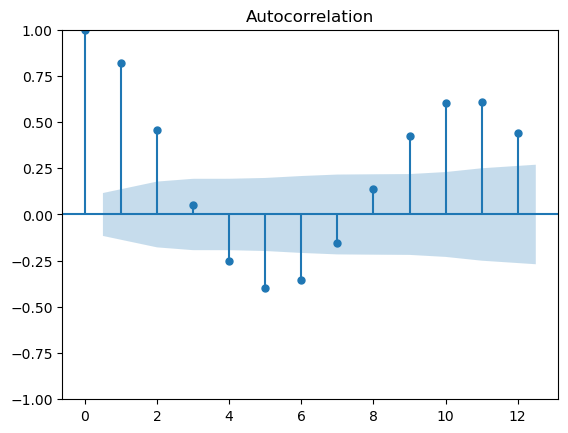

In [206]:

# 1. Autocorrelation at Seasonal Lags
from statsmodels.graphics.tsaplots import plot_acf

# Compute autocorrelation up to seasonal lag (e.g., lag 12 for monthly data)
seasonal_lag = 12
acf_result = plot_acf(tdata['diff_sunactivity'], lags=seasonal_lag)

# Interpretation: Look for significant spikes at the seasonal lags
# Significant spikes in the autocorrelation plot at the seasonal lags indicate potential seasonality.

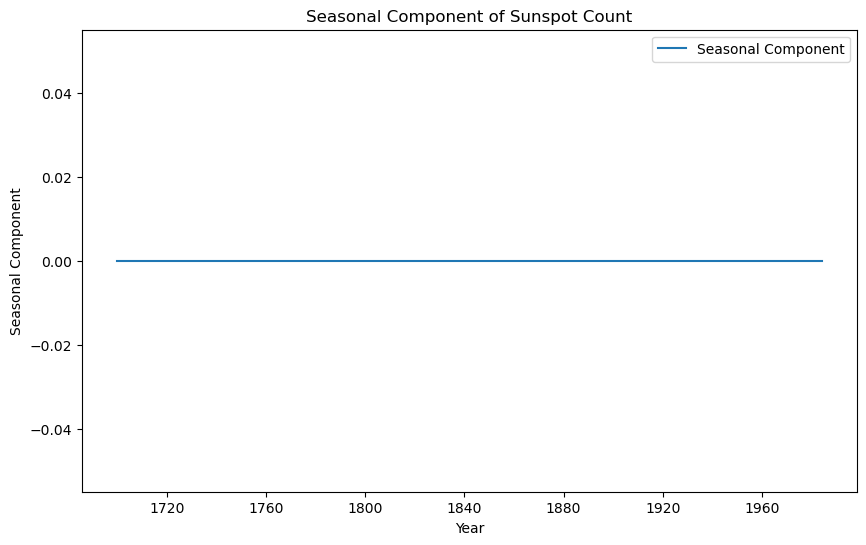

In [207]:
# Seasonal Decomposition and Residual Analysis

from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(tdata['diff_sunactivity'], model='additive')

# Check the seasonal component
seasonal_component = decomposition.seasonal

# Statistical tests or visual inspection of the seasonal component
# Example: Plot the seasonal component
plt.figure(figsize=(10, 6))
plt.plot(tdata.index, seasonal_component, label='Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Component of Sunspot Count')
plt.legend()
plt.show()



In [208]:
# Fourier Transform and Spectral Analysis

import numpy as np
from scipy.fft import fft, fftfreq

# Compute Fourier transform
n = len(tdata)
yf = fft(tdata['diff_sunactivity'])
xf = fftfreq(n)

# Plot amplitude spectrum (ignore the DC component)
plt.figure(figsize=(10, 6))
plt.plot(xf[1:n//2], 2.0/n * np.abs(yf[1:n//2]))
plt.xlabel('Frequency (1/year)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform Spectrum')
plt.grid()
plt.show()

# Interpretation: Peaks in the amplitude spectrum at specific frequencies indicate dominant seasonal periods in the data.

KeyError: 'ALIGNED'